Vamos analisar dados iris, utilizando ML- Arvore de decisoes.

In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

# 1. Carregar o conjunto de dados Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target #V. alvo
df.tail()

In [ ]:
# 2. Mapear os números para os nomes das espécies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# 3. Mostrar as 5 primeiras linhas
print(df.head())

# 4. Separar features (X) e variável alvo (y)
X = df.drop(columns=['species'])  # Características da flor, v. independentes
y = df['species']  # Nome da espécie, v. dependente

In [140]:
# 5. Dividir em 80% treino e 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Criar o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


#modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo = DecisionTreeClassifier()
#iowa_model = DecisionTreeRegressor(random_state=1)


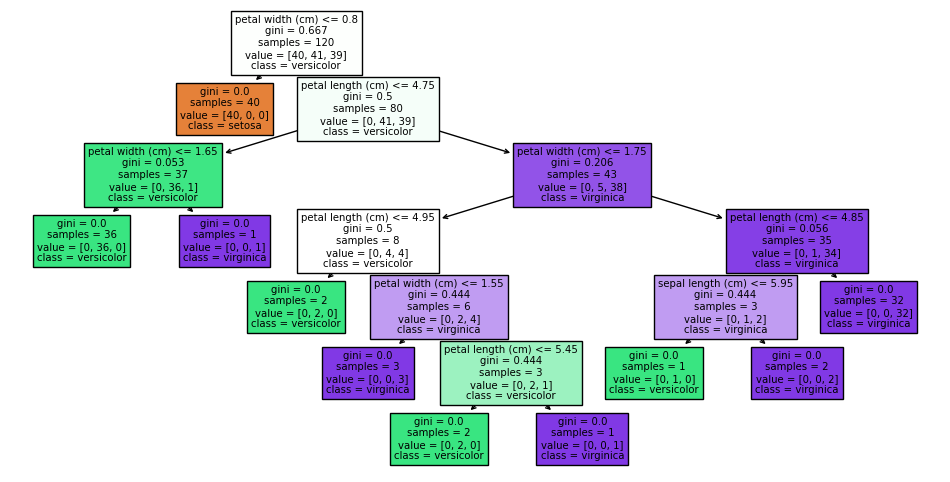

In [132]:
# 7. Treinar o modelo ou ajustar e Fazer previsões no conjunto de teste
modelo=modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)    #print (y_pred) #predicted values

# 8. Visualizar a Árvore de Decisão
plt.figure(figsize=(12, 6))
tree.plot_tree(modelo, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
#O Gráfico da Árvore revela como as decisões são tomadas com base no comprimento e largura das pétalas e sépalas.

Como etapa final, avaliaremos o desempenho da análise preditiva do nosso modelo Python executando um relatório de classificação e uma curva ROC.


Um relatório de classificação é um relatório de avaliação de desempenho usado para avaliar o desempenho de modelos de aprendizado de máquina pelos 5 critérios a seguir:

A precisão é uma pontuação usada para avaliar o desempenho do modelo. Quanto maior, melhor;
O recall mede a capacidade do modelo de prever corretamente os valores positivos verdadeiros;
Precisão é a razão entre verdadeiros positivos e a soma de verdadeiros e falsos positivos;
F-score combina precisão e recall em uma métrica. Idealmente, seu valor deve ser o mais próximo de 1, melhor;
Suporte é o número de ocorrências reais de cada classe no conjunto de dados.


In [139]:
from sklearn import metrics
from sklearn.metrics import classification_report

# Calcular acurácia
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia do modelo: {round(acuracia * 100, 2)}%")   # ou print(f'Accuracy: ',metrics.accuracy_score(y_teste, y_pred))
print('CL Report:',metrics.classification_report(y_teste, y_pred, zero_division=1))

Acurácia do modelo: 100.0%
CL Report:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



A árvore mostra como as decisões são feitas com base nas características das flores.

O modelo divide os dados usando as variáveis mais importantes (exemplo: Petal.Length).